In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_Facebook.csv', delimiter=';')

In [3]:
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.shape

(500, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page_total_likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post_Month                                                           500 non-null    int64  
 4   Post_Weekday                                                         500 non-null    int64  
 5   Post_Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [6]:
df.head()

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [7]:
df.isna().sum()

Page_total_likes                                                       0
Type                                                                   0
Category                                                               0
Post_Month                                                             0
Post_Weekday                                                           0
Post_Hour                                                              0
Paid                                                                   1
Lifetime_Post_Total_Reach                                              0
Lifetime_Post_Total_Impressions                                        0
Lifetime_Engaged_Users                                                 0
Lifetime_Post_Consumers                                                0
Lifetime_Post_Consumptions                                             0
Lifetime_Post_Impressions_by_people_who_have_liked_your_Page           0
Lifetime_Post_reach_by_people_who_like_your_Page   

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [9]:
df.isna().sum()

Page_total_likes                                                       0
Type                                                                   0
Category                                                               0
Post_Month                                                             0
Post_Weekday                                                           0
Post_Hour                                                              0
Paid                                                                   0
Lifetime_Post_Total_Reach                                              0
Lifetime_Post_Total_Impressions                                        0
Lifetime_Engaged_Users                                                 0
Lifetime_Post_Consumers                                                0
Lifetime_Post_Consumptions                                             0
Lifetime_Post_Impressions_by_people_who_have_liked_your_Page           0
Lifetime_Post_reach_by_people_who_like_your_Page   

In [10]:
df.dtypes

Page_total_likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post_Month                                                               int64
Post_Weekday                                                             int64
Post_Hour                                                                int64
Paid                                                                   float64
Lifetime_Post_Total_Reach                                                int64
Lifetime_Post_Total_Impressions                                          int64
Lifetime_Engaged_Users                                                   int64
Lifetime_Post_Consumers                                                  int64
Lifetime_Post_Consumptions                                               int64
Lifetime_Post_Impressions_by_people_who_have_liked_y

C:\Users\avnss\AppData\Local\Temp\ipykernel_27128\3351207266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Total_Interactions', data=df, palette='Set2')


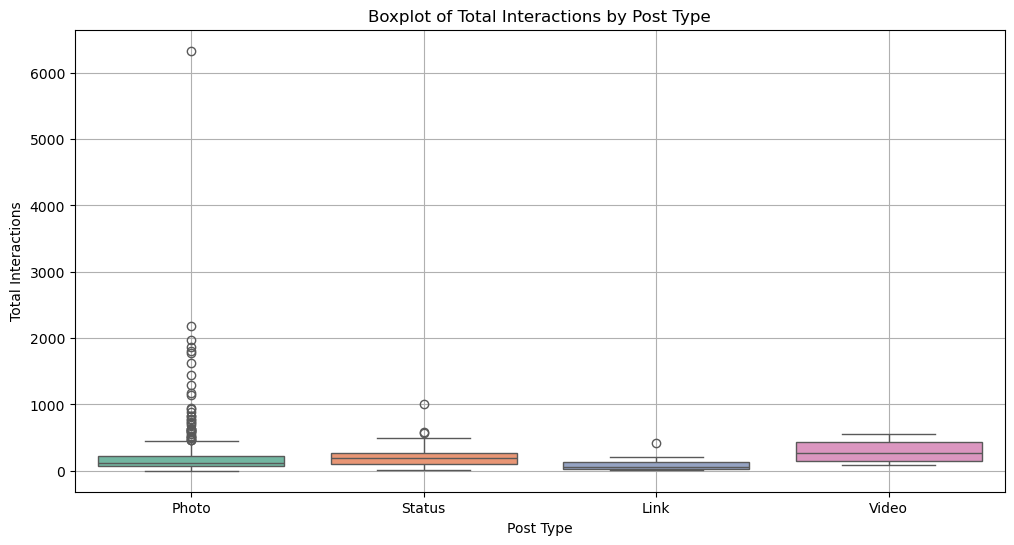

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Total_Interactions', data=df, palette='Set2')
plt.title('Boxplot of Total Interactions by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Total Interactions')
plt.grid(True)
plt.show()


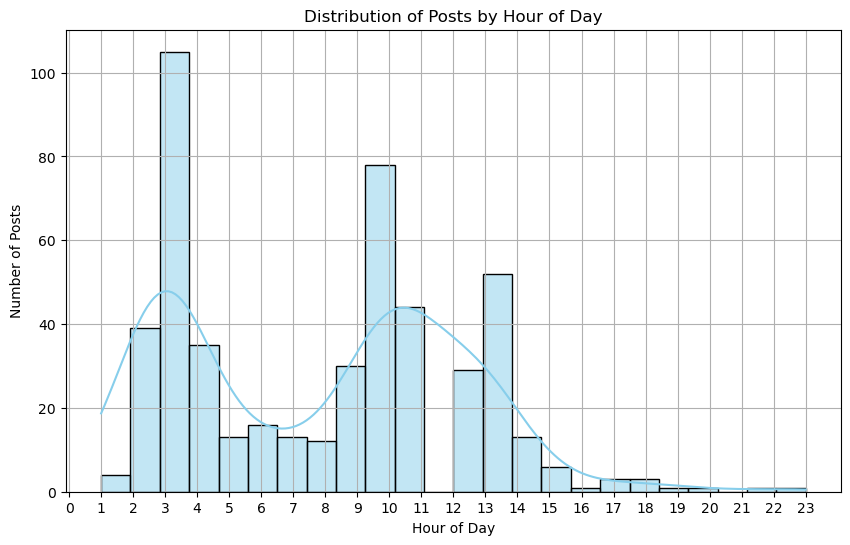

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Post_Hour'], bins=24, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Posts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


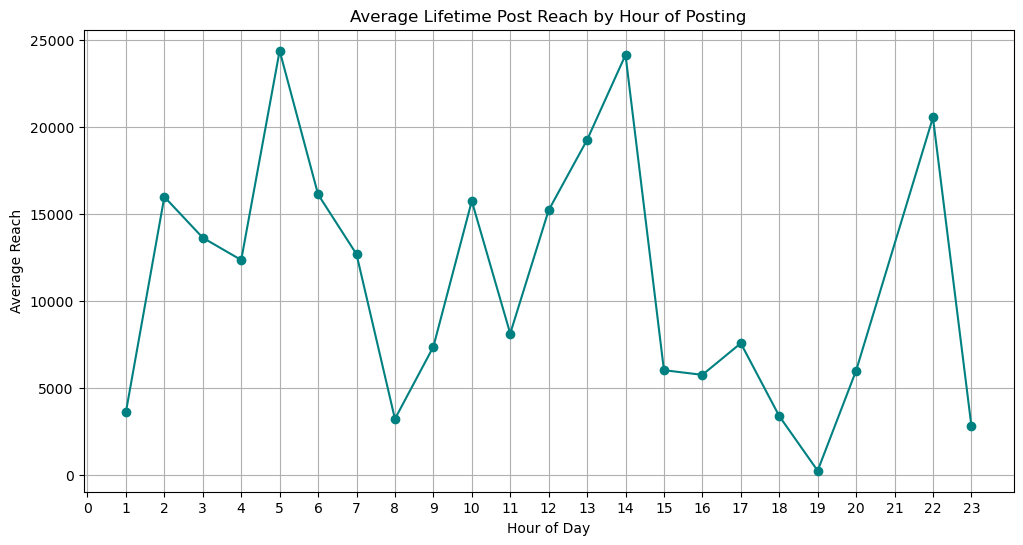

In [13]:
# Grouping by hour to calculate average reach
hourly_reach = df.groupby('Post_Hour')['Lifetime_Post_Total_Reach'].mean()

# Basic check
hourly_reach.head()

plt.figure(figsize=(12, 6))
hourly_reach.plot(kind='line', marker='o', color='teal')
plt.title('Average Lifetime Post Reach by Hour of Posting')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reach')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


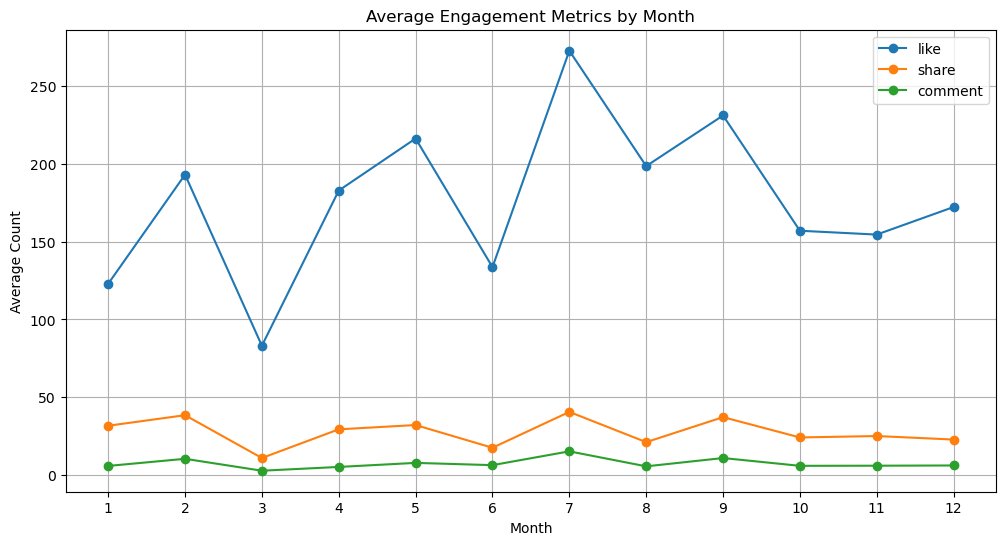

In [14]:
# Group by month and calculate mean metrics
monthly_metrics = df.groupby('Post_Month')[['like', 'share', 'comment']].mean()

# Quick check
monthly_metrics.head()

plt.figure(figsize=(12, 6))
for column in monthly_metrics.columns:
    plt.plot(monthly_metrics.index, monthly_metrics[column], marker='o', label=column)

plt.title('Average Engagement Metrics by Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()
